## Eigenvalue problem and solvig Schrodinger equation in 1D

### Mesh grading

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
start = -10
dx = 0.05
stop = 10
x = np.arange(start,stop+dx,dx)
n = np.size(x)
omega = 1
m = 1
hbar = 1

Define first normal derivative operator :

In [92]:
D1x = (-np.diag(np.ones(n),0) + np.diag(np.ones(n-1),1))/dx
D1x[n-1,0] = 1/dx

Define momentum operator :

In [93]:
P1x = -1j*hbar*D1x
P2x = (np.matmul(P1x,P1x.conj().T) + np.matmul(P1x.conj().T,P1x))/2

Define potential operator :

In [94]:
Vx = 0.5 * m * omega**2 * x**2
Vx = np.diag(Vx)

Plot potential : 

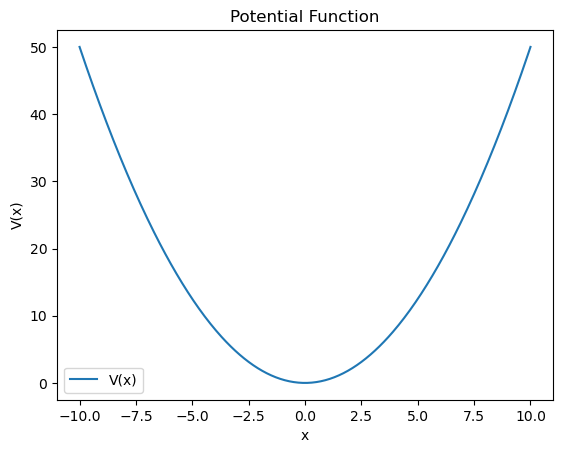

In [95]:
plt.plot(x, np.diag(Vx), label='V(x)')
plt.title('Potential Function')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.legend()
plt.show()

Define Hamiltonian operator and solve eigenvalue problem :

In [118]:
H = P2x/(2*m) + Vx
eigenvalues , eigenvectors = np.linalg.eigh(H.real)

Wave function and energy for ground state :

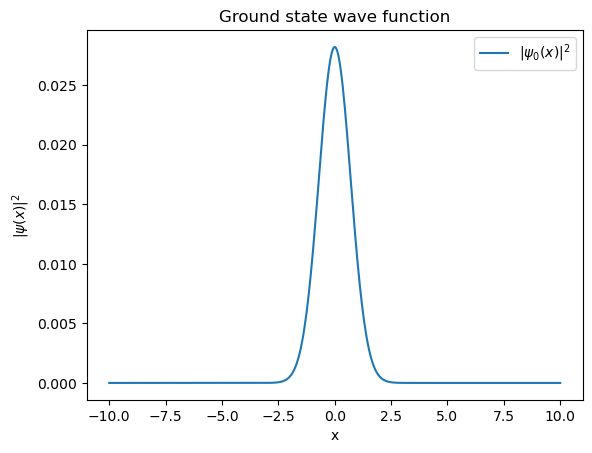

In [122]:
E0 = eigenvalues[0]
wavefunction0 = eigenvectors[:,0]
plt.plot(x, np.abs(wavefunction0)**2, label='$|\psi_0(x)|^2$')
plt.title('Ground state wave function')
plt.xlabel('x')
plt.ylabel('$|\psi(x)|^2$')
plt.legend()
plt.show()

Wave function and energy for first excited state : 

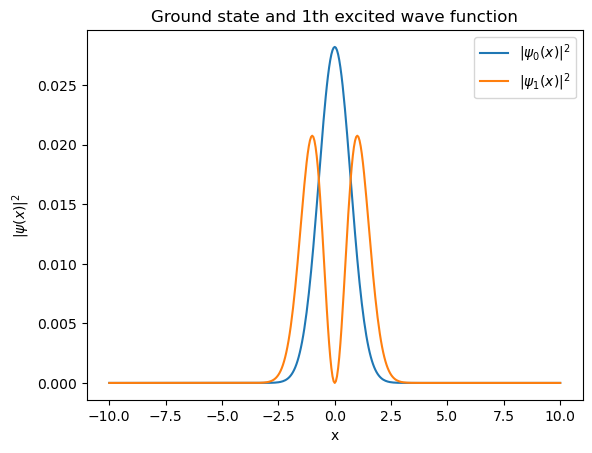

In [123]:
E1 = eigenvalues[1]
wavefunction1 = eigenvectors[:,1]
plt.plot(x, np.abs(wavefunction0)**2, label='$|\psi_0(x)|^2$')
plt.plot(x, np.abs(wavefunction1)**2, label='$|\psi_1(x)|^2$')
plt.title('Ground state and 1th excited wave function')
plt.xlabel('x')
plt.ylabel('$|\psi(x)|^2$')
plt.legend()
plt.show()

Plotting energy eigenvalues

(Theory: $E(n) = (n+\frac{1}{2}) \hbar \omega$ for $n=0,1,2,..$) : 

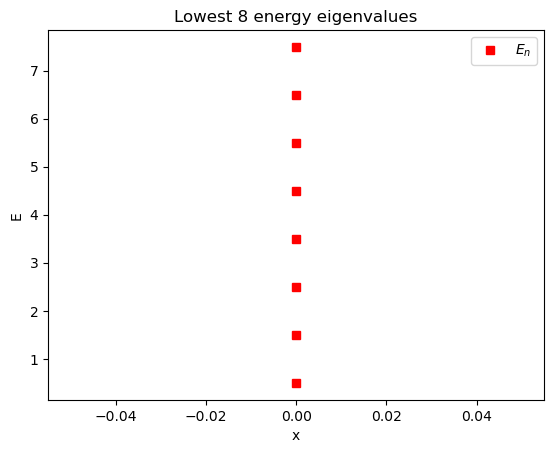

In [132]:
nE = 8
z = np.zeros(nE)
first_nE_eigenvalues = eigenvalues[0:nE]
plt.plot(z, first_nE_eigenvalues, 'rs' , label='$E_n$')
plt.title('Lowest 8 energy eigenvalues')
plt.xlabel('x')
plt.ylabel('E')
plt.legend()
plt.show()